In [1]:
import time
import bs4 #Utilisation de beautifulsoup pour le scraping
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sqlite3 as sq
from urllib import request    

In [2]:
db_stack = sq.connect("db_stack.db")
list_questions = []
list_votes = []
list_answers = []
list_views = []

In [ ]:
#Ici on va pouvoir définir le nombre de pages que l'on veut utiliser pour notre dataset

In [3]:
for i in range (5):
    time.sleep(1)
    url = "https://stackoverflow.com/questions?tab=newest&page="+str(i)
    request_text = request.urlopen(url).read()
    page = bs4.BeautifulSoup(request_text,'html.parser')
    questions = page.select(".s-post-summary")

In [4]:
      for question in questions:
            q = question.select_one('.s-link').get_text() # on récupère les titres de questions
            stats = question.select('.s-post-summary--stats')
            list_questions.append(q)
            for sta in stats:
                votes = sta.select('[title~=Score]')
                answers = sta.select('[title~=answer],[title~=answers]')
                views = sta.select('[title~=views]')
                for vote in votes:
                    votes_number = vote.select_one('.s-post-summary--stats-item-number').get_text() # on récupère le nombre de votes
                    votes_text= vote.select_one('.s-post-summary--stats-item-unit').get_text()
                    list_votes.append(int(votes_number))
                for answer in answers:
                    answers_number = answer.select_one('.s-post-summary--stats-item-number').get_text() # on récupère le nombre de réponses
                    answers_text = answer.select_one('.s-post-summary--stats-item-unit').get_text()
                    list_answers.append(int(answers_number))
                for view in views:
                    views_number = view.select_one('.s-post-summary--stats-item-number').get_text() # on récupère le nombre de vues
                    views_text = view.select_one('.s-post-summary--stats-item-unit').get_text()
                    list_views.append(int(views_number))


In [5]:
df = pandas.DataFrame.from_dict( {"Questions" : list_questions, "Votes" : list_votes, "Answers" : list_answers, "Vues" : list_views})
df

,Questions,Votes,Answers,Vues
0,While resolving the issue it's not processing,0,0,4
1,Updating value in dataframe by reading value f...,-2,0,17
2,Execute a function based on a specific scroll ...,0,0,5
3,project.assets.json' doesn't have a target for...,0,0,4
4,Memory error while runing regression with fixe...,0,0,7
5,Warning: filemtime(): stat failed for wp_enque...,0,1,11
6,Using HTML/CSS/JS to create an app and game av...,0,1,22
7,How do I reduce the number of bits of the card...,0,0,2
8,Kubernetes assigns server's public ip to harbo...,0,0,3
9,How to use Partial view with HttpPost?,0,0,6


In [6]:
df.to_sql(name='Stackoverflow',if_exists='replace',con=db_stack)
cursor = db_stack.cursor()
cursor.execute("SELECT * from Stackoverflow")
rows= cursor.fetchall()
for row in rows:
    print(row)
db_stack.close()

(0, "While resolving the issue it's not processing", 0, 0, 4)
(1, 'Updating value in dataframe by reading value from list in python', -2, 0, 17)
(2, 'Execute a function based on a specific scroll position in React native', 0, 0, 5)
(3, "project.assets.json' doesn't have a target for 'net6.0-windows'. in pipeline", 0, 0, 4)
(4, 'Memory error while runing regression with fixest::feols() on large dataset in R', 0, 0, 7)
(5, 'Warning: filemtime(): stat failed for wp_enqueue_style', 0, 1, 11)
(6, 'Using HTML/CSS/JS to create an app and game available on the play store', 0, 1, 22)
(7, 'How do I reduce the number of bits of the card number used to control access (ZKTeco InBio Pro door access panel over Push SDK 3.2.3)', 0, 0, 2)
(8, "Kubernetes assigns server's public ip to harbor loadbalancer service", 0, 0, 3)
(9, 'How to use Partial view with HttpPost?', 0, 0, 6)
(10, "Trying to make Conway's game of life, how do I get the rect to fit into a grid square in pygame", 0, 1, 8)
(11, 'K8s servi

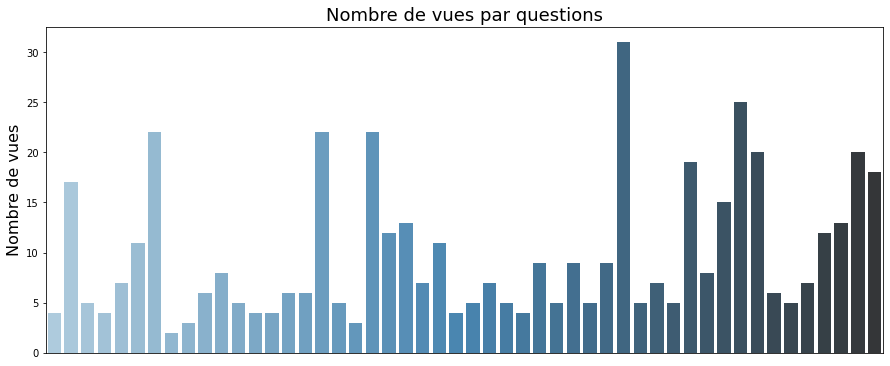

In [7]:
plt.figure(figsize=(15,6))
g1 = sb.barplot(x="Questions", y="Vues", data=df,palette="Blues_d")
g1.set(xticklabels=[])
plt.xlabel("Questions", fontsize=16, color="black")
plt.ylabel("Nombre de vues", fontsize=16, color="black")
plt.title("Nombre de vues par questions", fontsize=18, color="black")
g1.set(xlabel=None)
g1.tick_params(bottom=False)

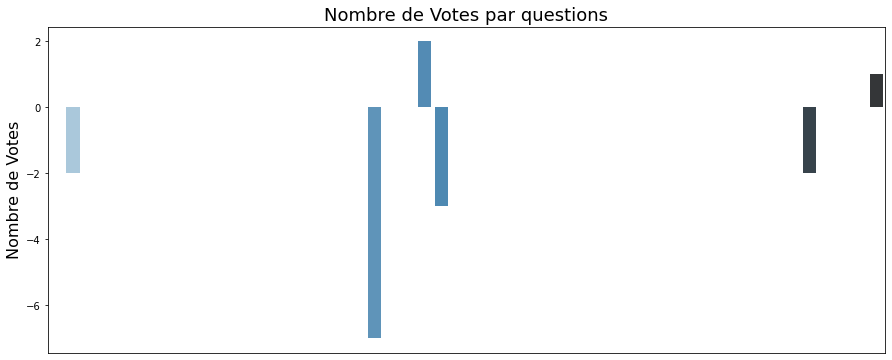

In [8]:
plt.figure(figsize=(15,6))
g2 = sb.barplot(x="Questions", y="Votes", data=df,palette="Blues_d")
g2.set(xticklabels=[])
plt.xlabel("Questions", fontsize=16, color="black")
plt.ylabel("Nombre de Votes", fontsize=16, color="black")
plt.title("Nombre de Votes par questions", fontsize=18, color="black")
g2.set(xlabel=None)
g2.tick_params(bottom=False)

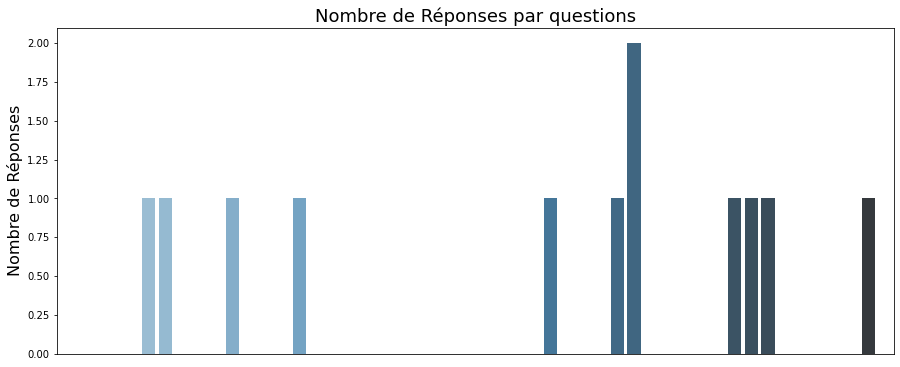

In [9]:
plt.figure(figsize=(15,6))
g3 = sb.barplot(x="Questions", y="Answers", data=df,palette="Blues_d")
g3.set(xticklabels=[])
plt.xlabel("Questions", fontsize=16, color="black")
plt.ylabel("Nombre de Réponses", fontsize=16, color="black")
plt.title("Nombre de Réponses par questions", fontsize=18, color="black")
g3.set(xlabel=None)
g3.tick_params(bottom=False)